# Ïó¨Îü¨Î∂ÑÏùò MBTIÎäî?
![alt text](a.png "Title")

In [1]:
# ÌïÑÏöî Ìå®ÌÇ§ÏßÄ Ìò∏Ï∂ú
!pip install psycopg2-binary
!pip install psycopg2
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
import re
import pyautogui
import random
import psycopg2
import pandas as pd
import urllib.request
import json

### DB Î∂àÎü¨Ïò§Í∏∞

In [2]:
# DB ÏÉùÏÑ±
conn_str = "host=localhost dbname=project user=postgres password=admin port=5432"

try:
    conn = psycopg2.connect(conn_str)
    print("=== Ï†ëÏÜç ÏÑ±Í≥µ =====")
# except:
#   print("Ï†ëÏÜçÏò§Î•ò !!")

except psycopg2.DatabaseError as db_err:
    print("Ï†ëÏÜçÏò§Î•ò !!")
    print(db_err)
    
cur = conn.cursor() # cursor Ïù∏Ïä§ÌÑ¥Ïä§ : Îç∞Ïù¥ÌÑ∞ Ï°∞ÏûëÏö© ÏÉùÏÑ±


=== Ï†ëÏÜç ÏÑ±Í≥µ =====


### instagram ÌÅ¨Î°§ÎßÅÏùÑ ÏúÑÌïú Ìï®Ïàò Ï†ïÏùò Î∞è Ï§ÄÎπÑ

In [ ]:
## Î¶¨Ïä§Ìä∏ 
MBTI = {"#ISTJ":0,"#ISTP":0,"#ISFJ":0,"#ISFP":0,"#INTJ":0,"#INTP":0,"#INFJ":0,"#INFP":0,
        "#ESTJ":0,"#ESTP":0,"#ESFJ":0,"#ESFP":0,"#ENTJ":0,"#ENTP":0,"#ENFJ":0,"#ENFP":0}

mbti = list(MBTI.keys())

Mbti = []
for i in range(mbti):
        Mbti.append(i.replace('#',''))

In [ ]:
# Ìï®Ïàò Ï†ïÏùò : Í≤ÄÏÉâÏñ¥ Ï°∞Í±¥Ïóê Îî∞Î•∏ url ÏÉùÏÑ±
def insta_searching(word):
    url = f"https://www.instagram.com/explore/tags/{word}"
    return url

In [ ]:
# Ìï®ÏàòÏ†ïÏùò : Ïó¥Î¶∞ ÌéòÏù¥ÏßÄÏóêÏÑú Ï≤´Î≤àÏß∏ Í≤åÏãúÎ¨º ÌÅ¥Î¶≠ + sleep Î©îÏÜåÎìú ÌÜµÌïòÏó¨ ÏãúÏ∞® ÎëêÍ∏∞
def select_first(driver):
    first = driver.find_elements_by_css_selector('div._9AhH0')[0]
    first.click()
    time.sleep(random.randint(2,5))

In [ ]:
# Ìï®Ïàò Ï†ïÏùò : Î≥∏Î¨∏ ÎÇ¥Ïö©, ÏûëÏÑ±ÏùºÏûê, Ï¢ãÏïÑÏöî Ïàò, Ìï¥ÏãúÌÉúÍ∑∏ Í∞ÄÏ†∏Ïò§Í∏∞
import re
from bs4 import BeautifulSoup

def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    # Î≥∏Î¨∏ ÎÇ¥Ïö©
    try:
        content = soup.select('div.C4VMK > span')[0].text
    except:
        content = " "

    # Ìï¥ÏãúÌÉúÍ∑∏
    tags = re.findall(r'#[^\s#,\\]+', content)

    # ÏûëÏÑ±ÏùºÏûê
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    # Ï¢ãÏïÑÏöî
    try:
        like = soup.select('div._7UhW9.xLCgt.qyrsm')[0].text
    except:
        like = 0
    

    return content, tags,date,like

In [ ]:
# Ï≤´ Î≤àÏß∏ Í≤åÏãúÎ¨º ÌÅ¥Î¶≠ ÌõÑ Îã§Ïùå Í≤åÏãúÎ¨º ÌÅ¥Î¶≠
def move_next(driver):
    right = driver.find_element_by_css_selector("div.l8mY4.feth3")
    right.click()
    time.sleep(random.randint(3,5))

### instagram ÌÅ¨Î°§ÎßÅ ÏΩîÎìú

In [ ]:
# ÌÅ¨Î°§ÎßÅ ÏãúÏûë
"""
driver.get(url)ÏùÑ ÌÜµÌï¥ Í≤ÄÏÉâ ÌéòÏù¥ÏßÄ Ï†ëÏÜçÌïòÍ≥†,
target Î≥ÄÏàòÏóê ÌÅ¨Î°§ÎßÅÌï† Í≤åÏãúÍ∏ÄÏùò ÏàòÎ•º Î∞îÏù∏Îî©
"""

## ENFP, INFP, INFJ

# Ïù∏Ïä§ÌÉÄÍ∑∏Îû® Î°úÍ∑∏Ïù∏ÏùÑ ÏúÑÌïú Í≥ÑÏ†ï Ï†ïÎ≥¥
username = pyautogui.prompt("Ïù∏Ïä§ÌÉÄ ÏïÑÏù¥ÎîîÎ•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî.")
userpw = pyautogui.prompt("ÎπÑÎ∞ÄÎ≤àÌò∏Î•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî.")
time.sleep(3)

# ÌÅ¨Î°¨ Î∏åÎùºÏö∞Ï†Ä Ïó¥Í∏∞
driver = webdriver.Chrome(r"C:\chromedriver.exe")
driver.get('https://www.instagram.com')
# loginUrl = 'https://www.instagram.com/accounts/login/'
time.sleep(random.randint(3,5))

# login
driver.find_element_by_name('username').send_keys(username)
driver.find_element_by_name('password').send_keys(userpw)
time.sleep(random.randint(1,2))
driver.find_element_by_css_selector('button.sqdOP.L3NKy.y3zKF').click()
time.sleep(random.randint(3,5))

# Ï†ïÎ≥¥ ÎÇòÏ§ëÏóê Ï†ÄÏû•ÌïòÍ∏∞ ÌÅ¥Î¶≠ÌïòÍ≥† ÎÑòÏñ¥Í∞ÄÍ∏∞
driver.find_element_by_css_selector('button.sqdOP.yWX7d.y3zKF').click()
time.sleep(random.randint(3,5))
# ÏÑ§Ï†ï ÎÇòÏ§ëÏóêÌïòÍ∏∞ ÌÅ¥Î¶≠ÌïòÍ≥† ÎÑòÏñ¥Í∞ÄÍ∏∞
driver.find_element_by_css_selector('button.aOOlW.HoLwm').click()
time.sleep(random.randint(3,5))


# Í≤åÏãúÎ¨ºÏùÑ Ï°∞ÌöåÌï† Í≤ÄÏÉâ ÌÇ§ÏõåÎìú ÏûÖÎ†• ÏöîÏ≤≠
word = pyautogui.prompt("Í≤ÄÏÉâÏñ¥Î•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî.")
url = insta_searching(word)

# Í≤ÄÏÉâ Í≤∞Í≥º ÌéòÏù¥ÏßÄ Ïó¥Í∏∞
driver.get(url)
time.sleep(random.randint(5,8))

# Ï≤´ Î≤àÏß∏ Í≤åÏãúÎ¨º ÌÅ¥Î¶≠
select_first(driver)

# Î≥∏Í≤©Ï†ÅÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏãúÏûë
## ÏàòÏßëÌï† Í≤åÏãúÎ¨ºÏùò Ïàò (ÏµúÍ∑º 500Í∞ú)

for n in range(500):
    print(n)
    
    try:
        # ÎÇ†Ïßú, ÎÇ¥Ïö©, Ìï¥ÏãúÌÉúÍ∑∏, Ï¢ãÏïÑÏöî Ïàò
        content,tags,date,like = get_content(driver)
        move_next(driver)
        
        if n < 9 or word != 'MBTI':
            if word != 'MBTI':
                try:
                    # Í∞Å mbtiÏóê ÎåÄÌïú ÎÇ†Ïßú, ÎÇ¥Ïö©, Ìï¥ÏãúÌÉúÍ∑∏, Ï¢ãÏïÑÏöî Ïàò  DB
                    cur.execute(f"INSERT INTO public.{word.lower()} (day, content, tags, insta_like) VALUES (%s,%s,%s,%s);",(date,content,tags,like))
                    conn.commit()

                except:
                    conn.rollback()
                    print("--- DB error")
            else:
                try:
                    # Í≤ÄÏÉâÏñ¥ 'MBTI'Ïùò Ïù∏Í∏∞Í≤åÏãúÎ¨ºÏóê ÎåÄÌïú ÎÇ†Ïßú, ÎÇ¥Ïö©, Ìï¥ÏãúÌÉúÍ∑∏, Ï¢ãÏïÑÏöî Ïàò  DB
                    cur.execute("INSERT INTO public.popular (day, content, tags) VALUES (%s,%s,%s);",(date,content,tags))
                    conn.commit()
                    
                except:
                    conn.rollback()
                    print("--- DB error")
                
            
        else:
            if tags != []:
                for me in tags:
                    for i in range(0,len(MBTI)):            
                        if mbti[i] == me.upper():
                                MBTI[mbti[i]] += 1
                            
            else:
                for j in range(0,len(MBTI)):
                    m = ''.join(char for char in mbti[j] if  char.isalnum())
                    if m in content.upper():
                        MBTI[mbti[j]] += 1

                            
    except:
        time.sleep(random.randint(1,2))
        move_next(driver)

# mbtiÎ≥Ñ Ïñ∏Í∏âÎêú Ïàò DB
for no in mbti:
    try:
        cur.execute("INSERT INTO public.count (mbti,n) VALUES (%s,%s);",(no.replace('#',''),MBTI[no]))
        conn.commit()

    except:
        conn.rollback()
        print("--- DB error")

print(f'Ï¥ù Í≤åÏãúÎ¨º Ïàò Îäî (ÏµúÎåÄ1000Í∞úÎßå ÏàòÏßë) : {n-8}')

### Ïù∏Ïä§ÌÉÄ DBÎ•º Ïù¥Ïö©Ìïú ÏãúÍ∞ÅÌôî 
* Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞ Ìï®Ïàò Ï†ïÏùò

In [4]:
# line & bar Í∑∏ÎûòÌîÑ
def plot2(x,y,title,kind, xlabel, ylabel):
    import platform
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    import seaborn as sns

    # ÌïúÍ∏Ä Íπ®ÏßÄÎäî ÌòÑÏÉÅ ÏàòÏ†ï
    system_name = platform.system()
    if system_name == 'Windows':
        # Windows Ïö¥ÏòÅÏ≤¥Ï†ú
        plt.rc('font', family='Malgun Gothic')
    elif system_name == 'Darwin':
        # Mac OS
        plt.rc('font', family='AppleGothic')
    elif system_name == 'Linux':
        # Linux
        path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
        font_name = fm.FontProperties(fname=path, size=12)
        plt.rc('font', family=font_name)
    else:
        print("Not support")

    # Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    colors = sns.color_palette("pastel", len(x)) ## ÏÉâÏÉÅ ÏßÄÏ†ï
    plt.figure(figsize=(10,5))
    if kind == 'line':
        plt.plot(x,y,label=ylabel,marker='H')
            

    elif kind == 'bar':
        plt.bar(x,y,color=colors,edgecolor='black')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

* MBTIÎ≥Ñ Ïñ∏Í∏âÎêú Ïàò (Ïù∏Ïä§ÌÉÄ)

In [11]:
# Count DB Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
try:
    cur.execute("select * from public.count;") # sql Î¨∏Ïû•
    conn.commit()
    count = cur.fetchall()
    
except:
    conn.rollback()
    print("--- DB error")

No handles with labels found to put in legend.


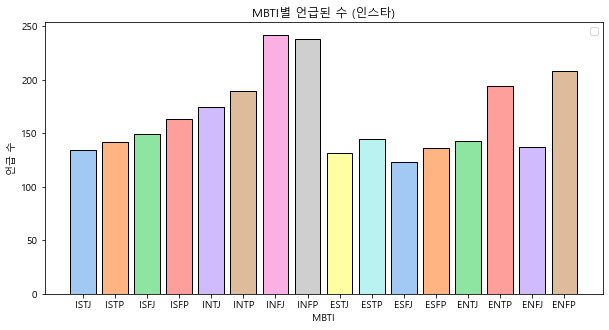

In [12]:
# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
mbti = []
n = []
for i in range(0,len(count)):
    mbti.append(count[i][0])
    n.append(count[i][1])

plot2(mbti,n,'MBTIÎ≥Ñ Ïñ∏Í∏âÎêú Ïàò (Ïù∏Ïä§ÌÉÄ)','bar','MBTI','Ïñ∏Í∏â Ïàò')

In [13]:
# DB Îç∞Ïù¥ÌÑ∞ Ï°∞Ìöå Î∂àÎü¨Ïò§Í∏∞ (INFJ, INFP, ENFP)
top3 = ['infj', 'infp', 'enfp']
idx = 0

top3_df = pd.DataFrame(columns=['mbti','Ï†ÑÏ≤¥Í≤åÏãúÎ¨º', 'Ï¢ãÏïÑÏöî Í≤åÏãúÎ¨º', '1000Í∞úÏù¥ÏÉÅ', '500Í∞úÏù¥ÏÉÅ',  '500Í∞úÎØ∏Îßå'])

for m in top3:
    try:
        cur.execute(f"select * from public.insta_{m};") # sql Î¨∏Ïû•
        conn.commit()
        mbti_kind = cur.fetchall()
        
        n1,n2,n3 = 0,0,0 # n1 : 1000Í∞úÏù¥ÏÉÅ n2 : 500Í∞úÏù¥ÏÉÅ n3 : ÎÇòÎ®∏ÏßÄ
        for i in range(0,len(mbti_kind)):
            if 'Ï¢ã' in mbti_kind[i][3]:
                if int(mbti_kind[i][3][4:-1].replace(',','')) > 999:
                    n1 += 1
                elif int(mbti_kind[i][3][4:-1].replace(',','')) > 499:
                    n2 += 1
                else:
                    n3 += 1
        top3_df.loc[idx] = [m,len(mbti_kind),(n1+n2+n3),n1,n2,n3,]
        idx += 1
          
    except:
        conn.rollback()
        print("--- DB error")

mbti_kind[0][3]

'Ï¢ãÏïÑÏöî 1,245Í∞ú'

In [14]:
Ï†ÑÏ≤¥ÎåÄÎπÑÏ¢ãÏïÑÏöî = []
Ï¢ãÏïÑÏöîÎåÄÎπÑ1000 = []
Ï¢ãÏïÑÏöîÎåÄÎπÑ500 = []

# Ï¢ãÏïÑÏöî Î≥ÄÏàò Ï†ïÏùò (Î∞òÏò¨Î¶º ÏûëÏóÖ)
for i in range(0,len(top3_df)):
    a1 = round((top3_df.iloc[i][2]/top3_df.iloc[i][1]*100), 2)
    a2 = round((top3_df.iloc[i][3]/top3_df.iloc[i][1]*100), 2)
    a3 = round(((top3_df.iloc[i][3]+top3_df.iloc[i][4])/top3_df.iloc[i][2]*100), 2)

    Ï†ÑÏ≤¥ÎåÄÎπÑÏ¢ãÏïÑÏöî.append(a1)
    Ï¢ãÏïÑÏöîÎåÄÎπÑ1000.append(a2)
    Ï¢ãÏïÑÏöîÎåÄÎπÑ500.append(a3)

# Dataframe Ïó¥ Ï∂îÍ∞Ä
top3_df['Ï†ÑÏ≤¥ÎåÄÎπÑÏ¢ãÏïÑÏöî']=Ï†ÑÏ≤¥ÎåÄÎπÑÏ¢ãÏïÑÏöî
top3_df['Ï¢ãÏïÑÏöîÎåÄÎπÑ1000']=Ï¢ãÏïÑÏöîÎåÄÎπÑ1000
top3_df['Ï¢ãÏïÑÏöîÎåÄÎπÑ500']=Ï¢ãÏïÑÏöîÎåÄÎπÑ500

top3_df

mbti Ï†ÑÏ≤¥Í≤åÏãúÎ¨º Ï¢ãÏïÑÏöî Í≤åÏãúÎ¨º 1000Í∞úÏù¥ÏÉÅ 500Í∞úÏù¥ÏÉÅ 500Í∞úÎØ∏Îßå  Ï†ÑÏ≤¥ÎåÄÎπÑÏ¢ãÏïÑÏöî  Ï¢ãÏïÑÏöîÎåÄÎπÑ1000  Ï¢ãÏïÑÏöîÎåÄÎπÑ500
0  infj   480     373      37     39    297    77.71       7.71     20.38
1  infp   491     415      43     27    345    84.52       8.76     16.87
2  enfp   495     433      25     29    379    87.47       5.05     12.47

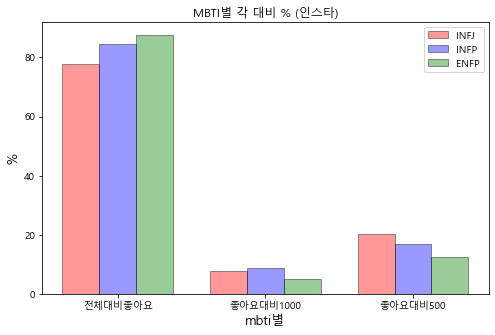

In [15]:
## Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
import matplotlib.pyplot as plt
import numpy as np

# Í∑∏Î¶º ÏÇ¨Ïù¥Ï¶à, Î∞î ÍµµÍ∏∞ Ï°∞Ï†ï
plt.figure(figsize=(8,5))
bar_width = 0.25

# MBTIÍ∞Ä 3Í∞úÏù¥ÎØÄÎ°ú 0, 1, 2 ÏúÑÏπòÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÏÇºÏùå
index = np.arange(3)

# Í∞Å Î≥ÄÏàòÎ≥ÑÎ°ú 3Í∞ú barÎ•º ÏàúÏÑúÎåÄÎ°ú ÎÇòÌÉÄÎÇ¥Îäî Í≥ºÏ†ï, Í∞Å Í∑∏ÎûòÌîÑÎäî 0.25Ïùò Í∞ÑÍ≤©ÏùÑ ÎëêÍ≥† Í∑∏Î†§Ïßê
b1 = plt.bar(index, list(top3_df.loc[0][6:]), bar_width, alpha=0.4, color='red', label='INFJ',edgecolor='black')

b2 = plt.bar(index + bar_width, list(top3_df.loc[1][6:]), bar_width, alpha=0.4, color='blue', label='INFP',edgecolor='black')

b3 = plt.bar(index + 2 * bar_width, list(top3_df.loc[2][6:]), bar_width, alpha=0.4, color='green', label='ENFP',edgecolor='black')

# xÏ∂ï ÏúÑÏπòÎ•º Ï†ï Í∞ÄÏö¥Îç∞Î°ú Ï°∞Ï†ïÌïòÍ≥† xÏ∂ïÏùò ÌÖçÏä§Ìä∏Î•º year Ï†ïÎ≥¥ÏôÄ Îß§Ïπ≠
plt.xticks(np.arange(bar_width, 3 + bar_width, 1), ['Ï†ÑÏ≤¥ÎåÄÎπÑÏ¢ãÏïÑÏöî','Ï¢ãÏïÑÏöîÎåÄÎπÑ1000','Ï¢ãÏïÑÏöîÎåÄÎπÑ500'])

# xÏ∂ï, yÏ∂ï Ïù¥Î¶Ñ Î∞è Î≤îÎ°Ä ÏÑ§Ï†ï
plt.xlabel('mbtiÎ≥Ñ', size = 13)
plt.ylabel('%', size = 13)
plt.title('MBTIÎ≥Ñ Í∞Å ÎåÄÎπÑ % (Ïù∏Ïä§ÌÉÄ)')
plt.legend()

### YOUTUBE

In [2]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
from pandas import DataFrame
import openpyxl
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
import time
import traceback
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
import platform
import sys
import csv
import numpy as np

# Î≥ÄÏàòÎ™Ö ÏùºÍ¥Ñ ÏßÄÏ†ï
mod = sys.modules[__name__]

# ÌïúÍ∏Ä Ìè∞Ìä∏ Ïò§Î•òÏãú
system_name = platform.system()
if system_name == 'Windows':
    # Windows Ïö¥ÏòÅÏ≤¥Ï†ú
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    # Mac OS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    # Linux
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

* ÌÇ§ÏõåÎìú Í≤ÄÏÉâ

In [ ]:
# Ïú†ÌäúÎ∏å Ï†ëÏÜç
driver = webdriver.Chrome()
driver.get('https://www.youtube.com/')
time.sleep(2)
driver.maximize_window()

base_url = "https://www.youtube.com/results?search_query="
# ÏµúÏã†Ïàú Í≤ÄÏÉâ
filter = "&sp=CAI%253D"
search_word = "ENFJ" # MBTIÏú†Ìòï ÏßÅÏ†ë ÏûÖÎ†•
url = base_url + search_word + filter
driver.get(url)
time.sleep(3)

for c in range(0,200):
    driver.find_element_by_tag_name('body').send_keys(Keys.PAGE_DOWN)
    time.sleep(1)

* ÌÅ¨Î°§ÎßÅ ÌõÑ CSV Ï†ÄÏû•

In [ ]:
df_title = []
df_link = []
df_view = []
df_date = []

html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

for i in range(len(soup.find_all('ytd-video-meta-block', 'style-scope ytd-video-renderer byline-separated'))) :
    title = driver.find_elements_by_xpath('//*[@id="video-title"]')[i].text
    link = 'https://www.youtube.com' + soup.find_all('a', {'id' : 'video-title'})[i]['href']
    view = soup.find_all('ytd-video-meta-block', 'style-scope ytd-video-renderer byline-separated')[i].text.split('‚Ä¢')[1].split('\n')[3]
    date = soup.find_all('ytd-video-meta-block', 'style-scope ytd-video-renderer byline-separated')[i].text.split('‚Ä¢')[1].split('\n')[4]

    df_title.append(title)
    df_link.append(link)
    df_view.append(view)
    df_date.append(date)

df_youtube = pd.DataFrame(columns=['ÏòÅÏÉÅÏ†úÎ™©', 'Ï°∞ÌöåÏàò', 'ÏóÖÎ°úÎìú', 'ÎßÅÌÅ¨'])

df_youtube['ÏòÅÏÉÅÏ†úÎ™©'] = df_title
df_youtube['Ï°∞ÌöåÏàò'] = df_view
df_youtube['ÏóÖÎ°úÎìú'] = df_date
df_youtube['ÎßÅÌÅ¨'] = df_link

driver.close()

In [3]:
# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î∂àÎü¨Ïò§Í∏∞
MBTI_list = ['ISTJ', 'ISFJ', 'INFJ', 'INTJ', 'ISTP', 'ISFP', 'INFP', 'INTP', 'ESTP', 'ESFP', 'ENFP', 'ENTP', 'ESTJ', 'ESFJ', 'ENFJ', 'ENTJ']
for i in MBTI_list :
    setattr(mod,'df_{}'.format(i), pd.read_csv('C:/jupyter_notebook/data/df_youtube_%s.csv'%i))

df_INTP

ÏòÅÏÉÅÏ†úÎ™©    Ï°∞ÌöåÏàò     ÏóÖÎ°úÎìú  \
0    Ep 350 Explaining INTP behaviour and what an E...     8Ìöå   2ÏãúÍ∞Ñ Ï†Ñ   
1                         ÎÇòÎûë mbti Í∞ôÏùÄ Ï∫êÎ¶≠ÌÑ∞ / mbti / intp     7Ìöå   3ÏãúÍ∞Ñ Ï†Ñ   
2     [MBTI ÏºÄÎØ∏ÎßåÌôî] 30Ìé∏ - INTP(Ïù∏ÌåÅ)Í≥º ENTJ(ÏóîÌã∞Ï†ú) : Ïó∞Ïï† ÏµúÍ≥† Í∂ÅÌï©   357Ìöå   3ÏãúÍ∞Ñ Ï†Ñ   
3             INTP book stuff and video after 3 months    51Ìöå   9ÏãúÍ∞Ñ Ï†Ñ   
4                              mbti intp-tÍ∞Ä Ïã¨Ïã¨ÌïòÎ©¥ ÏÉùÍ∏∞Îäî Ïùº     7Ìöå  10ÏãúÍ∞Ñ Ï†Ñ   
..                                                 ...    ...     ...   
554           ÔøΩÔøΩLa Personalidad INTP (Espa√±ol) Parte 1  1.4ÎßåÌöå    1ÎÖÑ Ï†Ñ   
555  [MBTI-DOL] INTP=Í≤åÏúºÎ•∏ Ï≤úÏû¨? INTP ÏïÑÏù¥Îèå Î™®Ïùå (Î∞©ÌÉÑÏÜåÎÖÑÎã®BTS/...   11ÎßåÌöå    1ÎÖÑ Ï†Ñ   
556                                         INTP ÏÑ±Í≤© Ïú†Ìòï   29ÎßåÌöå    1ÎÖÑ Ï†Ñ   
557  Logiker INTP erkl√§rt | 16 Personalities (Deutsch)  3.6ÎßåÌöå    1ÎÖÑ Ï†Ñ   
558         INTPÏóêÍ≤ê Ïñ¥Îñ§ ÏßÅÎ¨¥Í∞Ä Ïñ¥Ïö∏Î¶¥ÍπåÏöî? MBTIÎ°ú Ïó¨Îü¨Î∂ÑÏùò ÏßÅÎ¨¥Î•º Ï∞æÏïÑÎ¥ÖÏãúÎã§!  1.2ÎßåÌöå    2ÎÖÑ Ï†Ñ   

                                                    ÎßÅÌÅ¨  
0          https://www.youtube.com/watch?v=mH-eZQ7_r_E  
1          https://www.youtube.com/watch?v=GTtEXP9q08s  
2          https://www.youtube.com/watch?v=blvgjCFWuuE  
3          https://www.youtube.com/watch?v=nsgOvhBqdtI  
4          https://www.youtube.com/watch?v=g9L3LWmwHk8  
..                                                 ...  
554        https://www.youtube.com/watch?v=jPhTCeaRKYQ  
555        https://www.youtube.com/watch?v=5_I8NdLp3DQ  
556  https://www.youtube.com/watch?v=mr67ytkvH9Q&pp...  
557        https://www.youtube.com/watch?v=I8aS9-iX8cM  
558        https://www.youtube.com/watch?v=vZHeQSRFcgI  

[559 rows x 4 columns]

1. MBTIÎ≥Ñ ÏóÖÎ°úÎìú ÎèôÏòÅÏÉÅ Ïàò ÌååÏïÖ

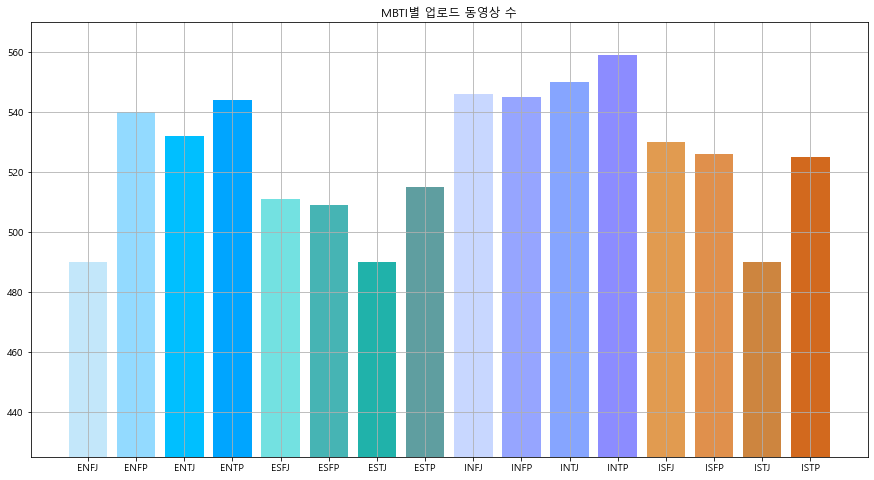

In [3]:
video_count = pd.read_csv('C:/jupyter_notebook/data/count.csv')
color_list = ['#C3E7FA','#93DAFF','#00BFFF','#00A5FF', '#73E1E1', '#46B4B4', '#20B2AA','#5F9EA0','#C8D7FF', '#96A5FF','#86A5FF','#8C8CFF', '#E19B50', '#E0904C', '#CD853F', '#D2691E']

# ÏãúÍ∞ÅÌôî
x_axis = video_count.iloc[:,0]
y_axis = video_count.iloc[:,1]

plt.figure(figsize=(15,8))
plt.title('MBTIÎ≥Ñ ÏóÖÎ°úÎìú ÎèôÏòÅÏÉÅ Ïàò')
plt.ylim(425,570)
plt.bar(x_axis, y_axis, color = color_list)
plt.grid(True)

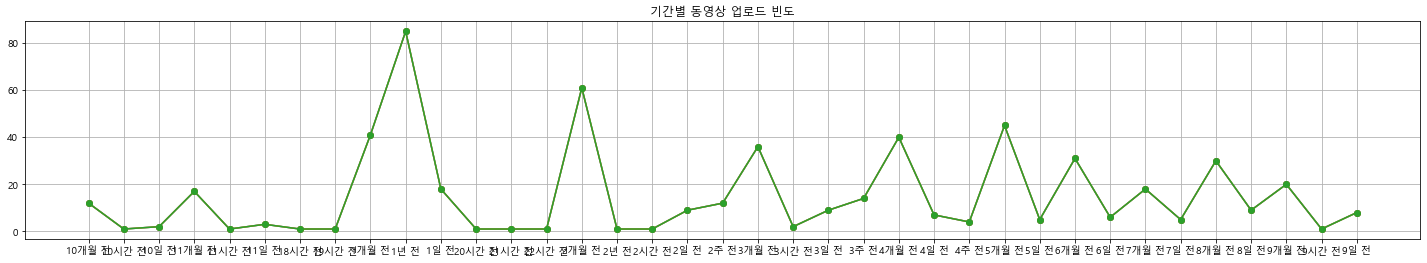

In [4]:
# Í∏∞Í∞ÑÎ≥Ñ ÎèôÏòÅÏÉÅ ÏóÖÎ°úÎìú ÎπàÎèÑ (ÏòàÏãú : Top1 intp)
freq = df_INTP.groupby(['ÏóÖÎ°úÎìú']).count()

plt.figure(figsize=(25,4))
plt.title('Í∏∞Í∞ÑÎ≥Ñ ÎèôÏòÅÏÉÅ ÏóÖÎ°úÎìú ÎπàÎèÑ')
plt.grid(True)
plt.plot(freq, marker='o', linestyle = '-')
plt.show()

2. Top1, Bottom1 MBTIÏùò ÌÇ§ÏõåÎìú ÌååÏïÖ

In [ ]:
top_list = ['INFJ', 'INTJ', 'INTP']
bot_list = ['ENFJ', 'ESTJ', 'ISTJ']

# ÌÉÄÏù¥ÌãÄ Î¶¨Ïä§Ìä∏ ÎßåÎì§Í∏∞
for i in top_list :
    setattr(mod, 'title_{}'.format(i),[])
for i in bot_list :
    setattr(mod, 'title_{}'.format(i),[])

for i in top_list :
    f = open('C:/jupyter_notebook/data/df_youtube_%s.csv'%i, 'r', encoding='utf-8')
    rdr = csv.reader(f)
    for line in rdr:
        getattr(mod, 'title_{}'.format(i)).append(line)
for i in bot_list :
    f = open('C:/jupyter_notebook/data/df_youtube_%s.csv'%i, 'r', encoding='utf-8')
    rdr = csv.reader(f)
    for line in rdr:
        getattr(mod, 'title_{}'.format(i)).append(line)

In [ ]:
# Î¨∏ÏûêÏó¥ Î∂ÑÎ¶¨ÌïòÏó¨ ÎπàÎèÑ Ïπ¥Ïö¥Ìä∏
title_ESTJ = [row[0] for row in title_ESTJ]

fre_ESTJ = []
for i in range(1,len(title_ESTJ)) :
    fre_ESTJ.append(title_ESTJ[i].split(' '))

# ...ÏûêÏó∞Ïñ¥ ÏãúÍ∞ÑÏóê Ïù¥Ïñ¥ÏÑú

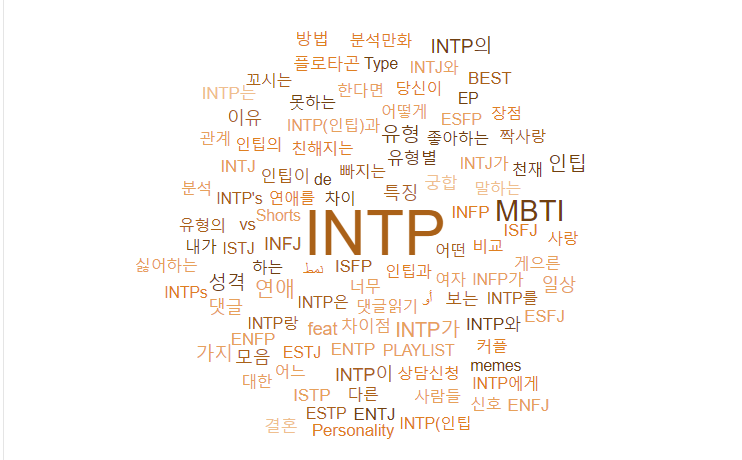

In [5]:
# ÏòàÏÉÅ ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú
from IPython.display import Image
Image(r"C:/jupyter_notebook/data/top INTP.png") # codeÏïàÏóêÏÑú ÎÇòÏò§Í≤å Ìï† Îïå

# Ìä∏ÏúÑÌÑ∞

### 1. ÏΩîÎìú ÏÜåÍ∞ú

In [1]:
import urllib
import urllib.request
from urllib.request import urlopen
import bs4
from bs4 import BeautifulSoup
from selenium import webdriver
import requests
from openpyxl import Workbook
import time
from Scweet.scweet import scrape
import pandas as pd
import xlwt

In [2]:
#Îç∞Ïù¥ÌÑ∞ ÌÅ¨Î°§ÎßÅ + csv Ï†ÄÏû•
def crl_and_str(mbti) :
    elems = scrape(words=mbti, since='2022-01-01', until='2022-01-31', \
        from_account = None, interval=1, headless=False, display_type='Top', \
        save_images=False, filter_replies=True)


#csv ÌååÏùºÏùÑ ÌåêÎã§Ïä§Î°ú Í∞ÄÏ†∏Ïò§Í∏∞
def get_csv(mbti) :
    df = pd.read_csv("C:/jupiterworkspace/outputs/"+mbti+"_2022-01-01_2022-01-31.csv", encoding='utf-8')


#Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú
def purify_df(df) :
    
    #ÌïÑÏöîÏóÜÎäî Ïó¥ ÏÇ≠Ï†ú
    df = df.drop(['UserScreenName', 'UserName', 'Text', 'Image link'], axis=1)
    
    #Í≤∞Ï∏°Ïπò = 0
    df['Comments'] = df['Comments'].fillna(0)
    df['Likes'] = df['Likes'].fillna(0)
    df['Retweets'] = df['Retweets'].fillna(0)

    #ÌïúÍµ≠Ïñ¥ -> Ïà´Ïûê
    df['Likes'] = df['Likes'].map(lambda x : replaceText(x))
    df['Retweets'] = df['Retweets'].map(lambda x : replaceText(x))
    
    #datetime ÌòïÌÉúÎ°ú ÌÉÄÏûÖÎ≥ÄÌôò
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Timestamp'] = df['Timestamp'].dt.tz_localize(None)

    #ÏöîÏùº Ïó¥ Ï∂îÍ∞Ä
    df.insert(1, 'Weekday', df['Timestamp'].dt.day_name(), True)

    #Í¥ëÍ≥†ÏÑ± Ï§ëÎ≥µÌñâ ÏÇ≠Ï†ú
    df.drop_duplicates('Embedded_text', keep='first')

    #ÌÉÄÏûÖÎ≥ÄÌôò
    df = df.astype({'Timestamp' : str, 'Weekday' : str, 'Comments' : int, 'Likes' : int, 'Retweets' : int})
    #df.head()

    return df

#Ï†ïÏ†úÌïú ÌåêÎã§Ïä§ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ csv ÌååÏùºÎ°ú Ï†ÄÏû•
def str_csv(mbti) :
    df.to_csv('C:\jupiterworkspace\crl_tp/' + mbti + '.csv')

#Ï≤ú, Îßå ÌïúÍµ≠Ïñ¥ Î≥¥Ï†ï
def replaceText(text):

    if isinstance(text, int) :
        text=text #0ÏúºÎ°ú Î∞îÍæº Í≤∞Ï∏°Ïπò Í∞íÏùÄ Ïù¥ÎØ∏ intÌòïÌÉúÏó¨ÏÑú Ïä¨ÎùºÏù¥Ïã± Î∂àÍ∞Ä, Í∑∏ÎåÄÎ°ú Î∞òÌôò
    elif text[-1] == 'Ï≤ú' :
        text = float(text[:-1]) * 1000 #2.4Ï≤ú -> 2.4*1000
    elif text[-1] == 'Îßå' :
        text = float(text[:-1]) * 10000 #2.4Îßå -> 2.4*10000
    
    return int(text)

In [ ]:
#Îç∞Ïù¥ÌÑ∞ ÌÅ¨Î°§ÎßÅ + csv ÌòïÌÉúÎ°ú Ï†ÄÏû•
mbti_list=['istj', 'istp', 'isfj', 'isfp', 'intj', 'intp', 'infj', 'infp', 'estj', 'estp', 'esfj', 'esfp', 'entj', 'entp', 'enfj', 'enfp']

for mbti in mbti_list :
    crl_and_str(mbti)
    
    df = pd.read_csv("C:/jupiterworkspace/outputs/"+mbti+"_2022-01-01_2022-01-31.csv", encoding='utf-8')
    
    df = purify_df(df)
    
    str_csv(mbti)


In [3]:
#Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌòïÌÉú Î≥¥Ïó¨Ï£ºÍ∏∞ Ïö©
mbti = 'enfj'
df = pd.read_csv("C:/jupiterworkspace/outputs/"+mbti+"_2022-01-01_2022-01-31.csv", encoding='utf-8')
df = purify_df(df)
df.head()

Timestamp   Weekday  \
0  2022-01-01 15:43:10  Saturday   
1  2022-01-01 01:24:21  Saturday   
2  2022-01-01 10:41:01  Saturday   
3  2022-01-01 10:42:08  Saturday   
4  2022-01-01 09:38:40  Saturday   

                                       Embedded_text     Emojis  Comments  \
0  ÌèâÏÜå Ï∞ê Ïó†ÎπÑÌã∞ÏïÑÏù¥ Entj Ïù∏Îç∞ Ï∞¨Ïù¥Îûë ÏõêÏö∞ ÎÇòÏò®Í±∞ Î≥¥Îãà ÎπÑÏä∑ÌïúÍ≤å Enfj Î°ú ÍΩ§...  ü§î ‚ú® ‚ú® üëâ ü§ó         0   
1  ÏßÄÎØºÏïÑ ÎãàÍ∞Ä ÎÇ¥ Î≥ÑÏù¥Í≥† Í≥†ÏñëÏù¥Í≥† ÎãàÍ∞Ä Ïß±Ïù¥Ïïº\nÎÑå ÏßÑÏßú ÎåÄÎ∞ïÏù¥Îã§ ÏÉàÎ≤ΩÎßàÎã§ Ï∞æÏïÑÏôÄÏÑú ...        NaN         0   
2  Ïö∞Ïó∞Ìûà enfj Í∞§Îü¨Î¶¨ Îì§Ïñ¥Í∞îÎã§Í∞Ä ÎÇòÎûë Ï†ºÎÇò ÎòëÍ∞ôÏùÄ Ïù∏Í∞ÑÎì§Îßå ÏûàÎä•Í±∞ Î≥¥Í≥† ÏãùÍ≤ÅÌï¥ÏÑú ...        NaN         0   
3  ÎÇòÎßå Ï∞êÎî∞ÎØ∏ ÎÑòÏπòÎäî ÏÇ¨ÎûåÎì§ Ï¢ãÏïÑÌïòÎäîÏ§Ñ ÏïåÏïòÎäîÎç∞ enfj ÎåÄÎ∂ÄÎ∂ÑÏù¥ Ï¢ãÏïÑÌïòÎÇòÎ¥ê„Öã„Öã„Öã„Öã„Öã...        NaN         0   
4  Í∏∞ÏÑ†Í≤∏ ISTP Í∞ôÍµ¨\nÏù¥ÎØ∏Ï£º ENFJ Í∞ôÎã§\nÏôÄ ÎÑàÎ¨¥ Ï†ïÎ∞òÎåÄÎÑ§ Ïù¥Î†áÍ≤å Îã§Î•∏Îç∞ Í∞ôÏù¥...          üåª         1   

   Likes  Retweets                                          Tweet URL  
0      0         1  https://twitter.com/gomandoooooooo/status/1477...  
1      0         0  https://twitter.com/jimimi_enfj/status/1477088...  
2      0         4  https://twitter.com/NA_NNAA_/status/1477228361...  
3      1         5  https://twitter.com/NA_NNAA_/status/1477228643...  
4      0         6  https://twitter.com/menuna_nana/status/1477212...

### 2. Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

istj : 1010
istp : 1503
isfj : 1299
isfp : 1429
intj : 1455
intp : 1546
infj : 1478
infp : 1449
estj : 1387
estp : 1412
esfj : 1445
esfp : 1458
entj : 1576
entp : 1924
enfj : 1378
enfp : 1443


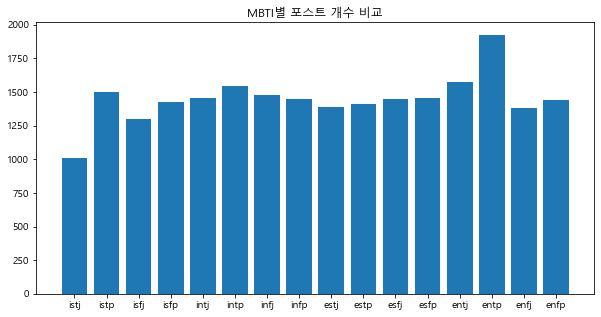

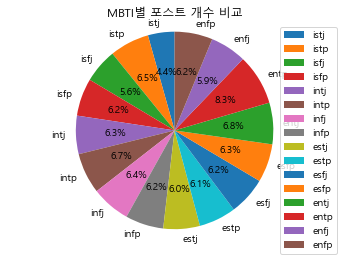

In [4]:
#MBTI Î≥Ñ Ìè¨Ïä§Ìä∏ Í∞úÏàò ÌååÏù¥Ï∞®Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

mbti_list = ['istj', 'istp', 'isfj', 'isfp', 'intj', 'intp', 'infj', 'infp', 'estj', 'estp', 'esfj', 'esfp', 'entj', 'entp', 'enfj', 'enfp']

count_post=[]

for mbti in mbti_list :
    df = pd.read_csv("C:/jupiterworkspace/outputs/"+mbti+"_2022-01-01_2022-01-31.csv", encoding='utf-8')
    df = purify_df(df)

    a = df.shape[0]
    print(mbti, ':', a)
    count_post.append(a)


#Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.rc('font', family='Malgun Gothic')
fig = plt.figure(figsize=(10,5))

plt.bar(mbti_list, count_post)
plt.title('MBTIÎ≥Ñ Ìè¨Ïä§Ìä∏ Í∞úÏàò ÎπÑÍµê')
plt.show()

plt.pie(count_post, labels=mbti_list, autopct='%.1f%%', startangle=90)
plt.axis('equal')
plt.title('MBTIÎ≥Ñ Ìè¨Ïä§Ìä∏ Í∞úÏàò ÎπÑÍµê')

plt.legend()
plt.show()


Ï†ÑÏ≤¥ mbtiÏùò ÌèâÍ∑† Ìè¨Ïä§Ìä∏ Ïàò : 1449
mbtiÎ≥Ñ Ï†ÑÏ≤¥ Ìè¨Ïä§Ìä∏ Ïàò : [1010, 1503, 1299, 1429, 1455, 1546, 1478, 1449, 1387, 1412, 1445, 1458, 1576, 1924, 1378, 1443]
Ï†ÑÏ≤¥ mbtiÏùò ÌèâÍ∑† Ï¢ãÏïÑÏöî Ïàò : 20
mbtiÎ≥Ñ ÌèâÍ∑† Ï¢ãÏïÑÏöî Ïàò : [14.0, 10.0, 11.0, 21.0, 9.0, 25.0, 19.0, 31.0, 10.0, 12.0, 6.0, 20.0, 9.0, 30.0, 17.0, 79.0]
Ï†ÑÏ≤¥ mbtiÏùò ÌèâÍ∑† Î¶¨Ìä∏Ïúó Ïàò : 34
mbtiÎ≥Ñ ÌèâÍ∑† Î¶¨Ìä∏Ïúó Ïàò : [20.0, 17.0, 20.0, 24.0, 23.0, 20.0, 29.0, 43.0, 18.0, 21.0, 14.0, 33.0, 18.0, 48.0, 51.0, 153.0]


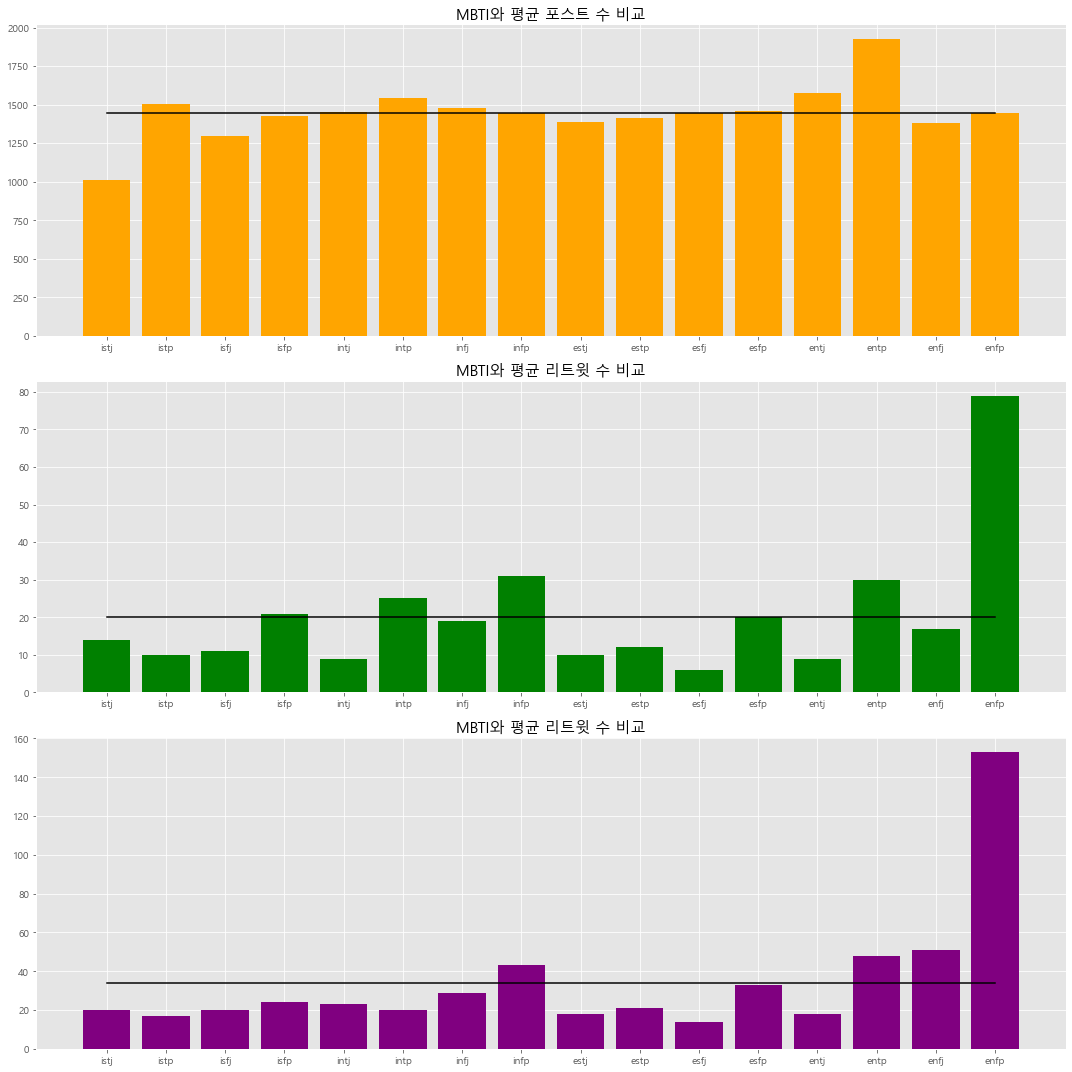

In [5]:
#MBTI Î≥Ñ Ìè¨Ïä§Ìä∏, Ï¢ãÏïÑÏöî, Î¶¨Ìä∏Ïúó Í∞úÏàò ÌèâÍ∑†Í≥º ÎπÑÍµê
import matplotlib.pyplot as plt

mbti_list = ['istj', 'istp', 'isfj', 'isfp', 'intj', 'intp', 'infj', 'infp', 'estj', 'estp', 'esfj', 'esfp', 'entj', 'entp', 'enfj', 'enfp']

count_post=[] #MBTIÎ≥Ñ Ìè¨Ïä§Ìä∏ Ïàò
sum_like=[] #MBTIÎ≥Ñ Ìè¨Ïä§Ìä∏Ïóê ÎåÄÌïú Ï¢ãÏïÑÏöî ÏàòÏùò Ìï©
sum_retweet=[] #MBTIÎ≥Ñ Ìè¨Ïä§Ìä∏Ïóê ÎåÄÌïú Î¶¨Ìä∏Ïúó ÏàòÏùò Ìï©
avg_like=[] #MBTIÎ≥Ñ Ìè¨Ïä§Ìä∏Ïóê ÎåÄÌïú Ï¢ãÏïÑÏöî ÏàòÏùò ÌèâÍ∑†
avg_retweet=[] #MBTIÎ≥Ñ Ìè¨Ïä§Ìä∏Ïóê ÎåÄÌïú Î¶¨Ìä∏Ïúó ÏàòÏùò ÌèâÍ∑†

for mbti in mbti_list :
    df = pd.read_csv("C:/jupiterworkspace/outputs/"+mbti+"_2022-01-01_2022-01-31.csv", encoding='utf-8')
    df = purify_df(df)
    
    count_post.append(df.shape[0])

    sum_like.append(df['Likes'].sum()) 
    sum_retweet.append(df['Retweets'].sum())

    avg_like.append(round(df['Likes'].mean(), 0))
    avg_retweet.append(round(df['Retweets'].mean(), 0))


count_total_post = sum(count_post) #Î™®Îì† MBTIÏùò Ìè¨Ïä§Ìä∏ ÏàòÏùò Ìï©
sum_total_like = sum(sum_like) #Î™®Îì† MBTIÏùò Ï¢ãÏïÑÏöî ÏàòÏùò Ìï©
sum_total_retweet = sum(sum_retweet) #Î™®Îì† MBTIÏùò Î¶¨Ìä∏Ïúó ÏàòÏùò Ìï©

avg_total_post = int(count_total_post / 16) #Ìè¨Ïä§Ìä∏ ÏàòÏùò ÌèâÍ∑†
avg_total_like = int(sum_total_like / count_total_post) #Ìïú Ìè¨Ïä§Ìä∏ Îãπ ÌèâÍ∑† Ï¢ãÏïÑÏöî Ïàò
avg_total_retweet = int(sum_total_retweet / count_total_post) #Ìïú Ìè¨Ïä§Ìä∏ Îãπ ÌèâÍ∑† Î¶¨Ìä∏Ïúó Ïàò

print('Ï†ÑÏ≤¥ mbtiÏùò ÌèâÍ∑† Ìè¨Ïä§Ìä∏ Ïàò :', avg_total_post)
print('mbtiÎ≥Ñ Ï†ÑÏ≤¥ Ìè¨Ïä§Ìä∏ Ïàò :', count_post)

print('Ï†ÑÏ≤¥ mbtiÏùò ÌèâÍ∑† Ï¢ãÏïÑÏöî Ïàò :', avg_total_like)
print('mbtiÎ≥Ñ ÌèâÍ∑† Ï¢ãÏïÑÏöî Ïàò :', avg_like)

print('Ï†ÑÏ≤¥ mbtiÏùò ÌèâÍ∑† Î¶¨Ìä∏Ïúó Ïàò :', avg_total_retweet)
print('mbtiÎ≥Ñ ÌèâÍ∑† Î¶¨Ìä∏Ïúó Ïàò :', avg_retweet)


#Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
avg1 = [avg_total_post]*16
avg2 = [avg_total_like]*16
avg3 = [avg_total_retweet]*16

plt.style.use('ggplot')
plt.rc('font', family='Malgun Gothic')
fig = plt.figure(figsize=(15,15))

axes1 = fig.add_subplot(3,1,1)
axes2 = fig.add_subplot(3,1,2)
axes3 = fig.add_subplot(3,1,3)

axes1.bar(mbti_list, count_post, color='orange')
axes2.bar(mbti_list, avg_like, color='green')
axes3.bar(mbti_list, avg_retweet, color='purple')

axes1.plot(mbti_list, avg1, color='black')
axes2.plot(mbti_list, avg2, color='black')
axes3.plot(mbti_list, avg3, color='black')

axes1.set_title('MBTIÏôÄ ÌèâÍ∑† Ìè¨Ïä§Ìä∏ Ïàò ÎπÑÍµê', size=15)
axes2.set_title('MBTIÏôÄ ÌèâÍ∑† Î¶¨Ìä∏Ïúó Ïàò ÎπÑÍµê', size=15)
axes3.set_title('MBTIÏôÄ ÌèâÍ∑† Î¶¨Ìä∏Ïúó Ïàò ÎπÑÍµê', size=15)

fig.tight_layout()
plt.show()


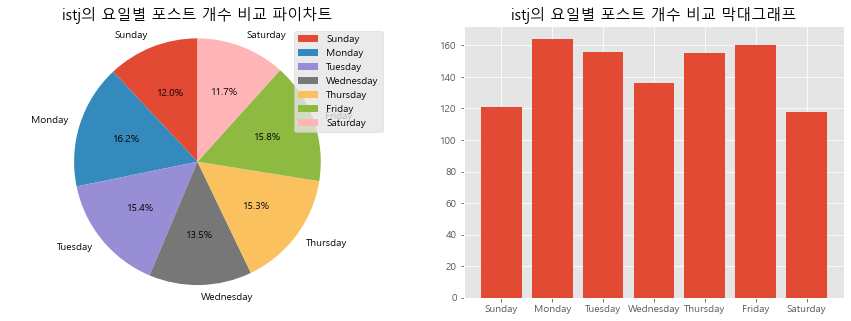

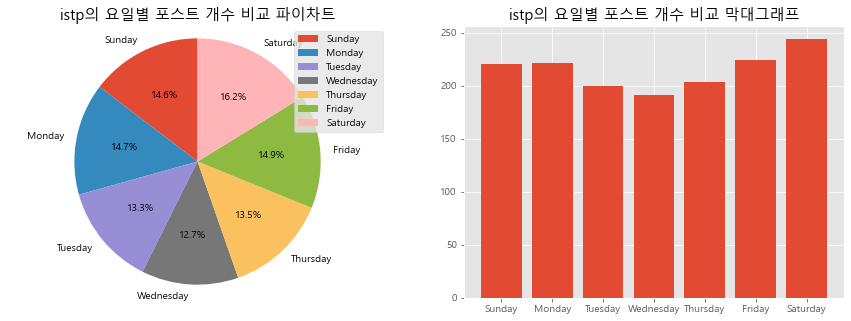

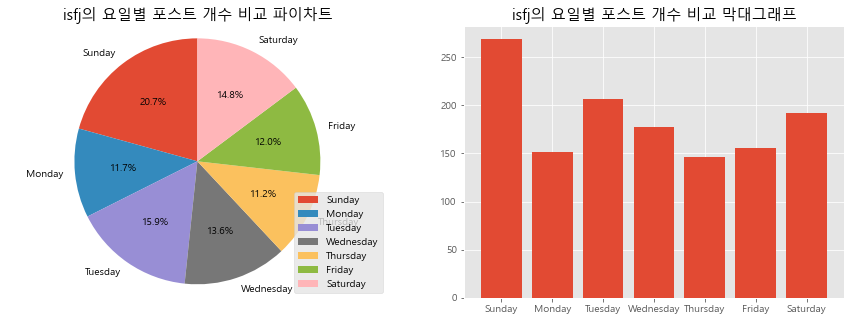

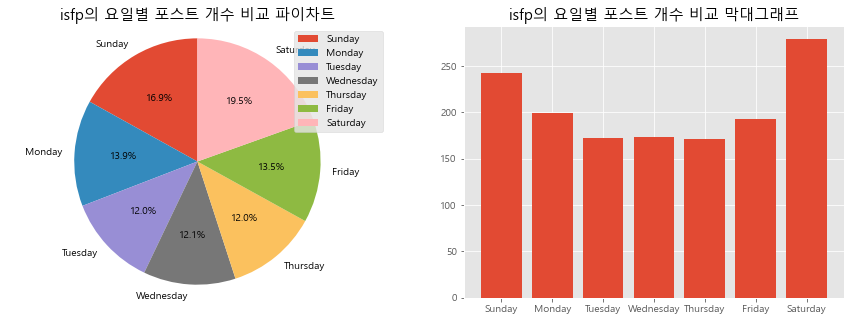

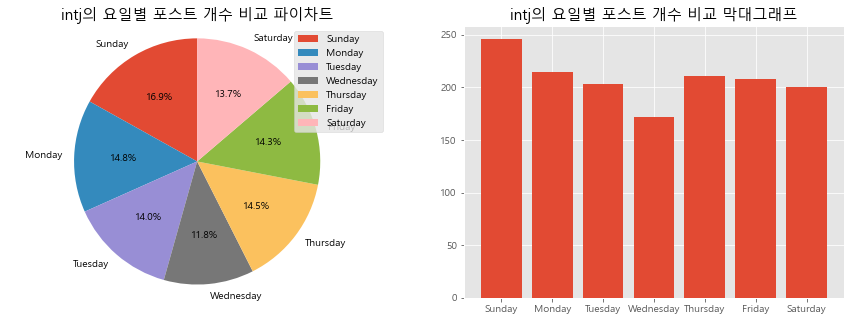

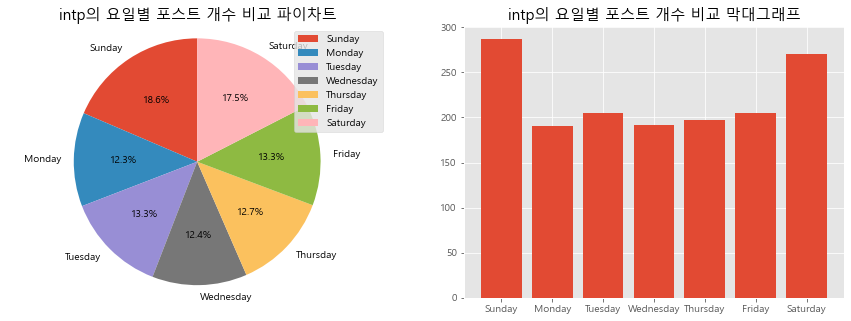

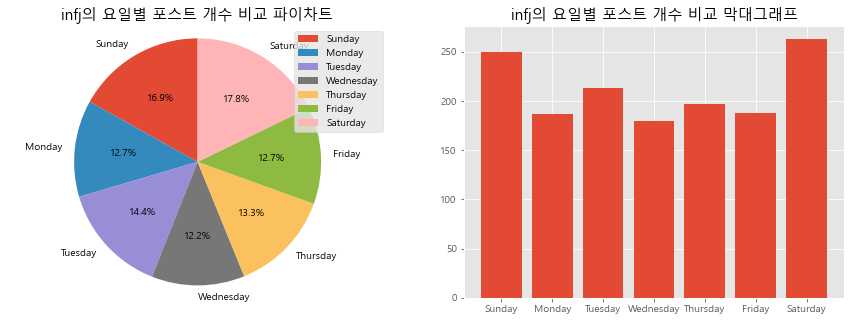

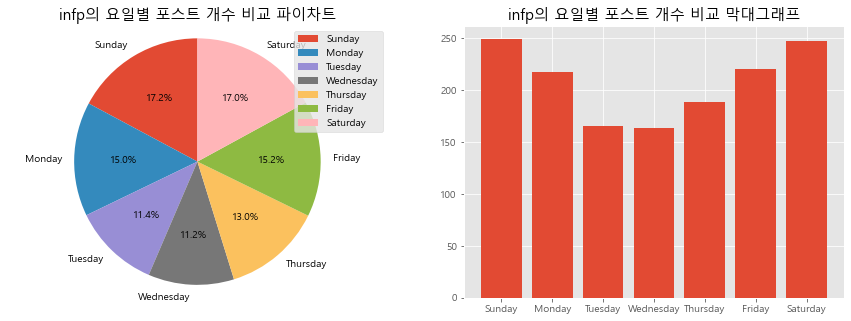

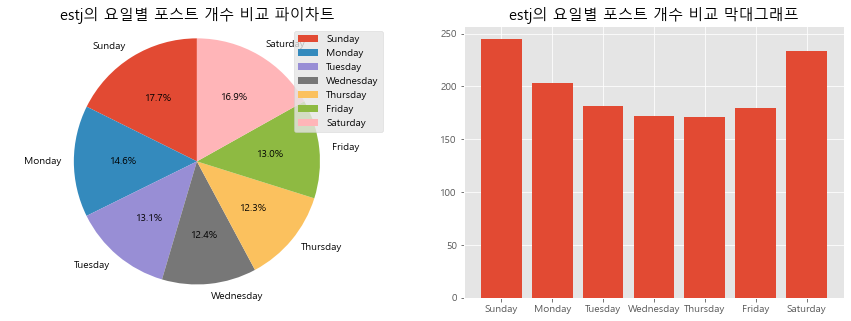

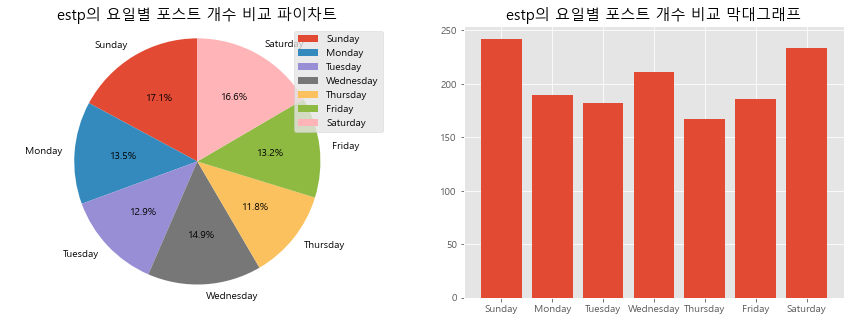

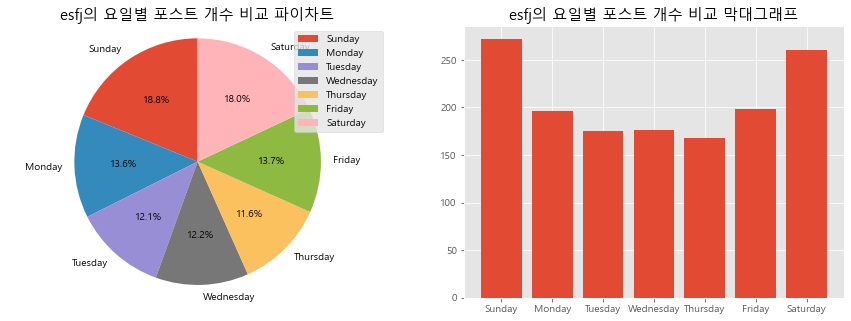

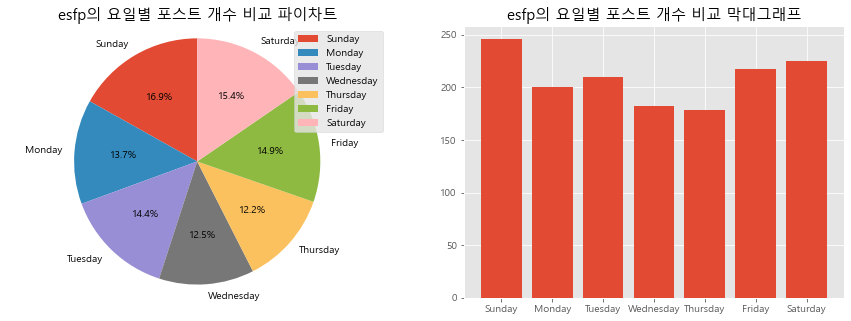

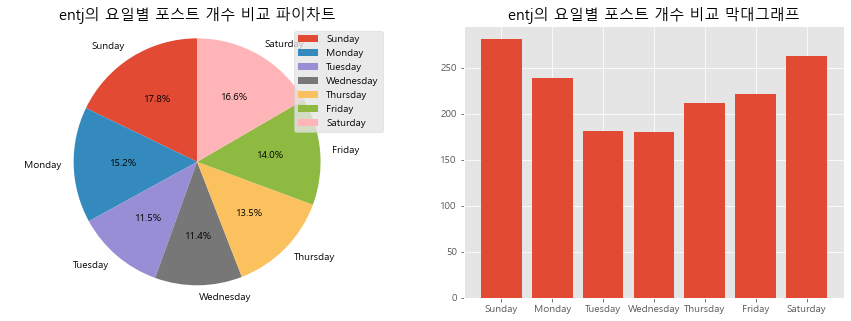

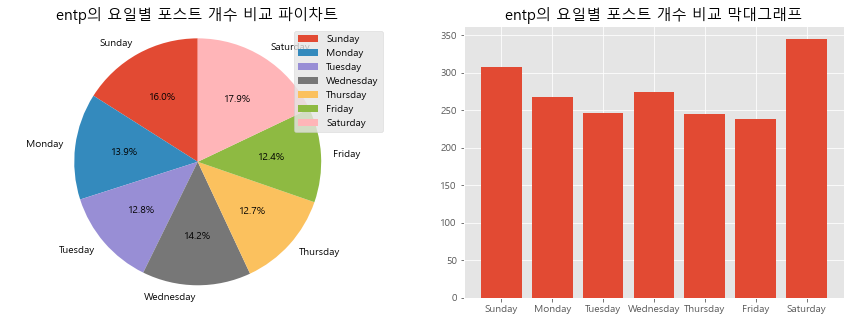

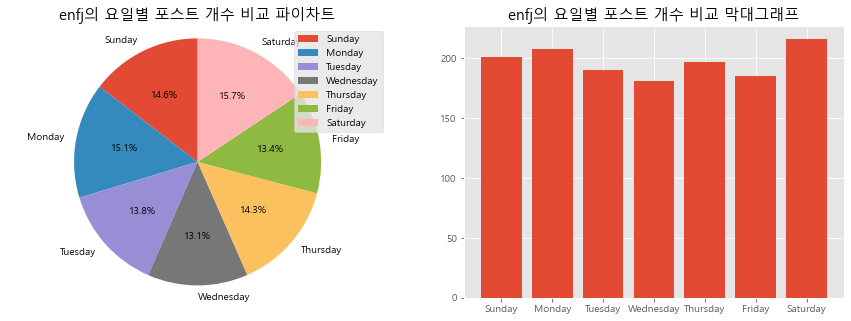

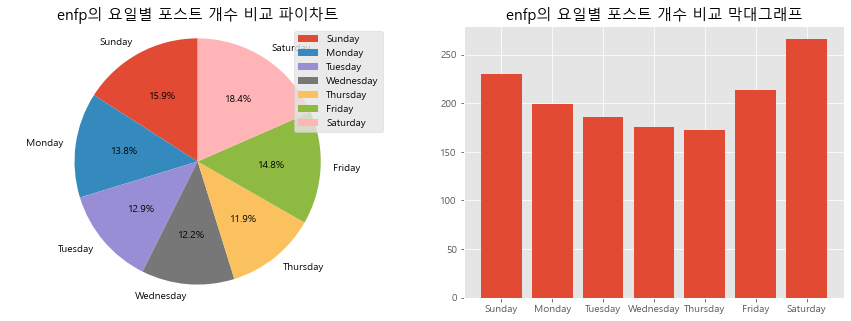

In [6]:
#MBTI Î≥Ñ ÏóÖÎ°úÎìú ÏöîÏùº ÌååÏù¥Ï∞®Ìä∏, ÎßâÎåÄÍ∑∏ÎûòÌîÑ
import matplotlib.pyplot as plt

mbti_list = ['istj', 'istp', 'isfj', 'isfp', 'intj', 'intp', 'infj', 'infp', 'estj', 'estp', 'esfj', 'esfp', 'entj', 'entp', 'enfj', 'enfp']

for mbti in mbti_list :
    df = pd.read_csv("C:/jupiterworkspace/outputs/"+mbti+"_2022-01-01_2022-01-31.csv", encoding='utf-8')
    df = purify_df(df)

    weekday_list = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    weekday_post = [] #MBTIÎ≥Ñ ÏöîÏùºÎ≥Ñ ÏóÖÎ°úÎìúÌïú  Ìè¨Ïä§Ìä∏ Í∞úÏàò 
    
    for weekday in weekday_list :

        a = df[ df['Weekday'] == weekday].count()
        weekday_post.append(a[0])


    #Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    plt.style.use('ggplot')
    plt.rc('font', family='Malgun Gothic')
    fig = plt.figure(figsize=(15,5))

    axes1 = fig.add_subplot(1,2,1)
    axes2 = fig.add_subplot(1,2,2)

    axes1.pie(weekday_post, labels=weekday_list, autopct='%.1f%%', startangle=90)
    axes1.axis('equal')
    axes1.set_title(mbti + 'Ïùò ÏöîÏùºÎ≥Ñ Ìè¨Ïä§Ìä∏ Í∞úÏàò ÎπÑÍµê ÌååÏù¥Ï∞®Ìä∏', size=15)
    axes1.legend()

    axes2.bar(weekday_list, weekday_post)    
    axes2.set_title(mbti + 'Ïùò ÏöîÏùºÎ≥Ñ Ìè¨Ïä§Ìä∏ Í∞úÏàò ÎπÑÍµê ÎßâÎåÄÍ∑∏ÎûòÌîÑ', size=15)

    plt.show()


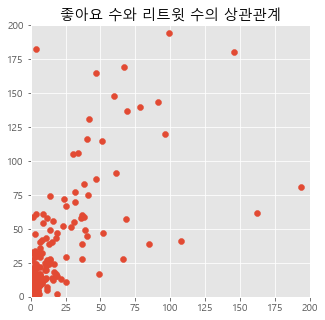

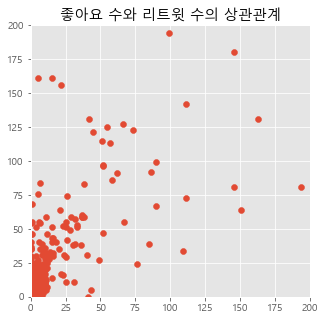

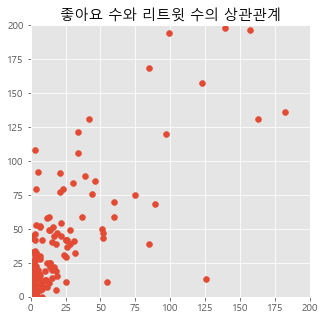

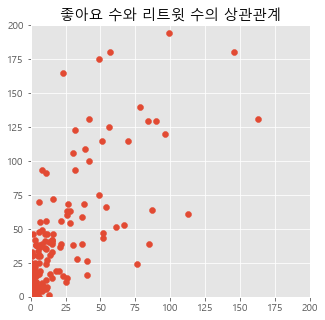

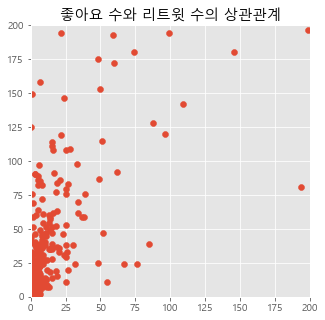

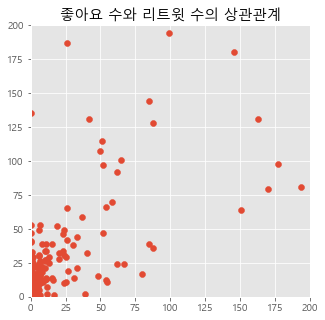

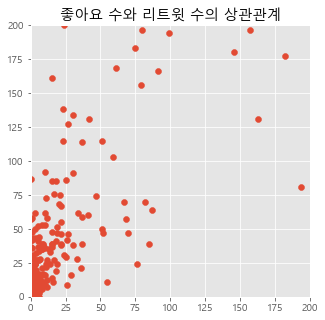

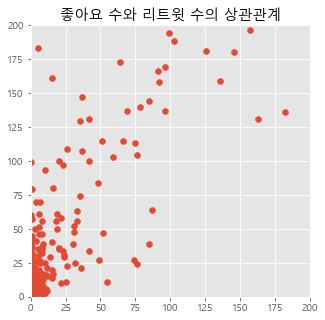

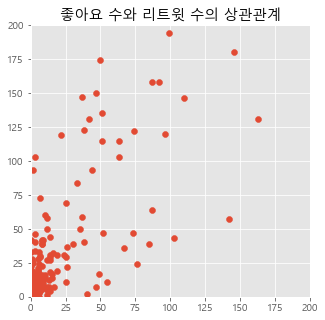

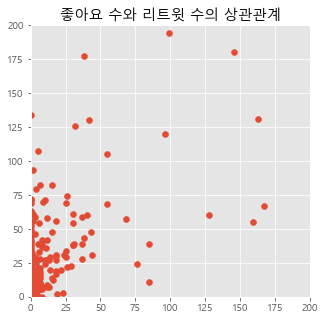

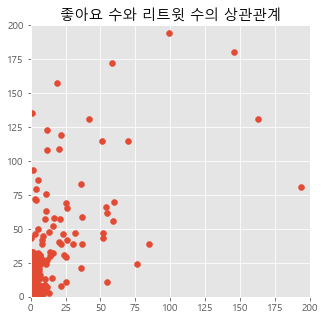

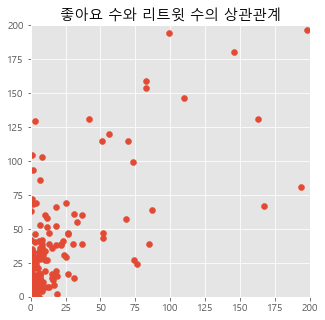

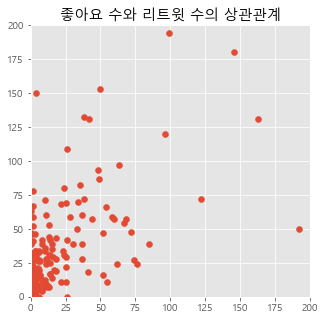

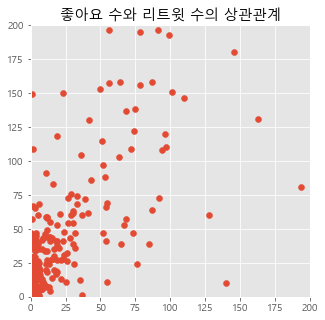

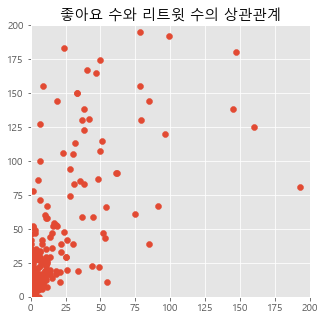

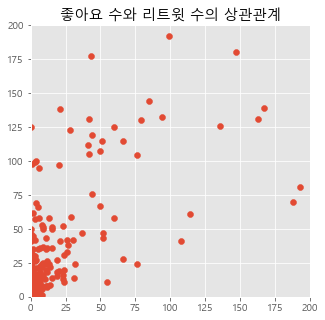

In [7]:
#Ï¢ãÏïÑÏöîÏôÄ Î¶¨Ìä∏Ïúó Í∞ÑÏùò ÏÇ∞Ï†êÎèÑ + Ï∂îÏÑ∏ÏÑ†
import matplotlib.pyplot as plt

mbti_list = ['istj', 'istp', 'isfj', 'isfp', 'intj', 'intp', 'infj', 'infp', 'estj', 'estp', 'esfj', 'esfp', 'entj', 'entp', 'enfj', 'enfp']

for mbti in mbti_list :
    df = pd.read_csv("C:/jupiterworkspace/outputs/"+mbti+"_2022-01-01_2022-01-31.csv", encoding='utf-8')
    df = purify_df(df)

    S_like = df['Likes'] #ÌäπÏ†ï MBTIÏùò Ï¢ãÏïÑÏöî ÏãúÎ¶¨Ï¶à
    L_like = S_like.values.tolist() #ÌäπÏ†ï MBTIÏùò Ï¢ãÏïÑÏöî Î¶¨Ïä§Ìä∏
    S_retweet = df['Retweets'] #ÌäπÏ†ï MBTIÏùò Î¶¨Ìä∏Ïúó ÏãúÎ¶¨Ï¶à
    L_retweet = S_retweet.values.tolist() #ÌäπÏ†ï MBTIÏùò Î¶¨Ìä∏Ïúó Î¶¨Ïä§Ìä∏


    #Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    plt.style.use('ggplot')
    plt.rc('font', family='Malgun Gothic')
    fig = plt.figure(figsize=(5, 5))

    plt.scatter(L_like, L_retweet, cmap='seismic')
    plt.title('Ï¢ãÏïÑÏöî ÏàòÏôÄ Î¶¨Ìä∏Ïúó ÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')
    
    plt.xlim(0, 200)
    plt.ylim(0, 200)

    plt.show()

### 3. ÏãúÎèÑÌñàÎçò Í≤É

- Ìä∏ÏúÑÌÑ∞ ÌôàÏóêÏÑúÎ∂ÄÌÑ∞ Í≤ÄÏÉâ >> Í≤ÄÏÉâÏñ¥ Î≤ÑÌäºÏù¥ ÏóÜÏñ¥ÏÑú Ìè¨Í∏∞

In [ ]:
#entjÎßå Í≤ÄÏÉâ
driver = webdriver.Chrome('chromedriver.exe')
driver.get("https://twitter.com/home")

#driver.maximize_window() # Ï∞Ω ÏµúÎåÄÌôî

time.sleep(3)

#id ÏûÖÎ†•Ï∞Ω
#<div dir="auto" class="css-901oao r-1awozwy r-18jsvk2 r-6koalj r-37j5jr r-1inkyih r-16dba41 r-135wba7 r-bcqeeo r-13qz1uu r-qvutc0">
# <input autocapitalize="sentences" autocomplete="username" autocorrect="on" name="text" spellcheck="true" type="text" dir="auto" 
# class="r-30o5oe r-1niwhzg r-17gur6a r-1yadl64 r-deolkf r-homxoj r-poiln3 r-7cikom r-1ny4l3l r-t60dpp r-1dz5y72 r-fdjqy7 r-13qz1uu" 
# value=""></div>
id = driver.find_element(By.CLASS_NAME, "r-30o5oe")
#By.
id.click()
id.send_keys('eellddeeii')

# Í≤ÄÏÉâÎ≤ÑÌäº ÏúÑÏπò Ï†ïÎ≥¥
#<div role="button" tabindex="0" class="css-18t94o4 css-1dbjc4n r-sdzlij r-1phboty r-rs99b7 r-ywje51 r-usiww2 r-2yi16 r-1qi8awa r-1ny4l3l 
# r-ymttw5 r-o7ynqc r-6416eg r-lrvibr r-13qz1uu" style="background-color: rgb(15, 20, 25); border-color: rgba(0, 0, 0, 0);">
# <div dir="auto" class="css-901oao r-1awozwy r-6koalj r-18u37iz r-16y2uox r-37j5jr r-a023e6 r-b88u0q r-1777fci r-rjixqe r-bcqeeo r-q4m81j 
# r-qvutc0" style="color: rgb(255, 255, 255);"><span class="css-901oao css-16my406 css-bfa6kz r-poiln3 r-a023e6 r-rjixqe r-bcqeeo r-qvutc0">
# <span class="css-901oao css-16my406 r-poiln3 r-bcqeeo r-qvutc0">Îã§Ïùå</span></span></div></div>
elem = driver.find_element_by_class_name('css-901oao')
elem.click() # Í≤ÄÏÉâ Î≤ÑÌäº ÌÅ¥Î¶≠.

# <button id="search_btn" type="submit" title="Í≤ÄÏÉâ" tabindex="3" class="btn_submit"
# onclick="window.nclick(this,'sch.action','','',event);" style="">
# <span class="blind">Í≤ÄÏÉâ</span>
# <span class="ico_search_submit"></span>
# </button>



# Í≤ÄÏÉâÏñ¥ ÏûÖÎ†•Ï∞Ω
# <div dir="auto" class="css-901oao r-18jsvk2 r-6koalj r-37j5jr r-a023e6 r-16dba41 r-rjixqe r-bcqeeo r-qvutc0">
# <input aria-activedescendant="typeaheadFocus-0.6184915028694735" aria-autocomplete="list" aria-label="Search query" 
# aria-owns="typeaheadDropdown-6" autocapitalize="sentences" autocomplete="off" autocorrect="off" placeholder="Search Twitter" 
# role="combobox" spellcheck="false" enterkeyhint="search" type="text" dir="auto" class="r-30o5oe r-1niwhzg r-17gur6a r-1yadl64 r-deolkf 
# r-homxoj r-poiln3 r-7cikom r-1ny4l3l r-xyw6el r-y0fyvk r-1dz5y72 r-fdjqy7 r-13qz1uu" data-testid="SearchBox_Search_Input" value="
# " aria-expanded="true" autofocus=""></div>
# <input aria-activedescendant="typeaheadFocus-0.6184915028694735" aria-autocomplete="list" aria-label="Search query" 
# aria-owns="typeaheadDropdown-6" autocapitalize="sentences" autocomplete="off" autocorrect="off" placeholder="Search Twitter" 
# role="combobox" spellcheck="false" enterkeyhint="search" type="text" dir="auto" class="r-30o5oe r-1niwhzg r-17gur6a r-1yadl64 r-deolkf 
# r-homxoj r-poiln3 r-7cikom r-1ny4l3l r-xyw6el r-y0fyvk r-1dz5y72 r-fdjqy7 r-13qz1uu" data-testid="SearchBox_Search_Input" value="
# " aria-expanded="true" autofocus="">
elem = driver.find_element(By.CLASS_NAME, 'r-30o5oe r-1niwhzg r-17gur6a r-1yadl64 r-deolkf r-homxoj r-poiln3 r-7cikom r-1ny4l3l r-xyw6el r-y0fyvk r-1dz5y72 r-fdjqy7 r-13qz1uu')
elem.send_keys('ENTJ')



- Í≤ÄÏÉâÍπåÏßÄ Îêú Ï∞ΩÏóêÏÑú ÌÅ¨Î°§ÎßÅ ÏãúÎèÑ >> ÌÅ¨Î°§ÎßÅÏùÑ ÌïòÎ†§Îãà Í≤ÄÏÉâÏñ¥ Ï†Ñ ÌÖçÏä§Ìä∏ / Í≤ÄÏÉâÏñ¥ / Í≤ÄÏÉâÏñ¥ ÌõÑ ÌÖçÏä§Ìä∏Í∞Ä Îî∞Î°ú Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏñ¥ÏÑú Ìè¨Í∏∞

In [ ]:

"""
#https://twitter.com/search?q=isfp&src=typed_query&f=top
search_word = input('Í≤ÄÏÉâÏñ¥ ÏûÖÎ†•')
base_url = 'https://twitter.com/search?q='
url = base_url + search_word + '&src=typed_query&f=top'
"""

#isfpÎßå Í≤ÄÏÉâ
url = 'https://twitter.com/search?q=isfp&src=typed_query&f=top'

#driver.maximize_window() # Ï∞Ω ÏµúÎåÄÌôî

#url Í∞ÄÏ†∏Ïò§Í∏∞ Ïò§Î•ò Î≥¥Ï†ï
response = requests.get(url)

if response.status_code == 200 : #Ï†ïÏÉÅ
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    pos = "#react-root > div > div > div.css-1dbjc4n.r-18u37iz.r-13qz1uu.r-417010 > main > div > div > div > div.css-1dbjc4n.r-14lw9ot.r-jxzhtn.r-1ljd8xs.r-13l2t4g.r-1phboty.r-1jgb5lz.r-11wrixw.r-61z16t.r-1ye8kvj.r-13qz1uu.r-184en5c > div > div:nth-child(2) > div > section > div > div"
    #<div lang="en" dir="auto" class="css-901oao r-18jsvk2 r-37j5jr r-a023e6 r-16dba41 r-rjixqe r-bcqeeo r-bnwqim r-qvutc0" id="id__cp12ar6u5b"><span class="css-901oao css-16my406 r-poiln3 r-b88u0q r-bcqeeo r-qvutc0">isfp</span><span class="css-901oao css-16my406 r-poiln3 r-bcqeeo r-qvutc0"> the best</span></div>
    divs = soup.select(pos) # Î¶¨Ïä§Ìä∏ Ï∂úÎ†•
    print(divs)
    #print(type(divs))

    #trs = divs.find_all('css-901oao') # <tr> ÏòÅÏó≠ Î∞∞Ïó¥Ïóê ÎÑ£Í∏∞
    #print(trs)

#<span class="css-901oao css-16my406 r-poiln3 r-bcqeeo r-qvutc0">Ooh another 20+ follow party! </span>
else :
    print(response.status_code)


- Ìä∏ÏúÑÌÑ∞ api ÏÇ¨Ïö© >> apiÎ°ú Ï†ëÏÜçÍ∞ÄÎä•Ìïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©ÌñàÏúºÎÇò ÏõêÌïòÎäî ÎßåÌÅºÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÇòÏò§ÏßÄ ÏïäÏïÑ Ìè¨Í∏∞

In [ ]:
twitter_consumer_key = "zoAQsNx4rRPwb1co1d39Fn0F3"
twitter_consumer_secret = "PaqlxxKmWGulHUWkNXpZZe2CABo13WukHerpGA0sLfNIrNRBq9"  
twitter_access_token = "1443424139700686849-WkEmjNWo2RY37fu9xH2jnqFhPBSJpX"
twitter_access_secret = "GRMezs9gA2Qk8ni3vf2UA69Gbha9NkmFXkCjMWSRXMnjX"

import twitter

twitter_api = twitter.Api(consumer_key=twitter_consumer_key,
                          consumer_secret=twitter_consumer_secret, 
                          access_token_key=twitter_access_token, 
                          access_token_secret=twitter_access_secret)

query = "ÏΩîÎ°úÎÇò"
statuses = twitter_api.GetSearch(term=query, count=10)

for status in statuses:
    print(status.text)

- ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±  >> konlpy ÏÑ§ÏπòÍ∞Ä ÏïàÎèºÏÑú Ìè¨Í∏∞

In [ ]:
from konlpy.tag import Okt
from collections import Counter
import pandas as pd

mbti = 'istj'
df = pd.read_csv("C:/jupiterworkspace/outputs/"+mbti+"_2022-01-01_2022-01-31.csv", encoding='utf-8')

twitter = Okt()
noun_adj_adv_list = []

for tweet in df['Embedded_text'] :
    for s, p in twitter.pos(tweet) :
        if p in ['Noun', 'Adjective', 'Adverb'] :
            noun_adj_adv_list.append(s)

count = Counter(noun_adj_adv_list)
words = dict(count.most_common()) #ÎπàÎèÑÏàò ÎåÄÎ°ú Îã®Ïñ¥ Ï†ïÎ†¨ & ÎîïÏÖîÎÑàÎ¶¨Ìôî
print(words)


- DBÏóêÏÑú ÌååÏùºÏùÑ ÏùΩÏñ¥ÏôÄÏÑú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ± >> wordcloud ÏÑ§ÏπòÍ∞Ä ÏïàÎèºÏÑú Ìè¨Í∏∞

In [ ]:
# DB Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
try:
    cur.execute("select embedded_text from public.enfj;") # sql Î¨∏Ïû•
    conn.commit()
    text = cur.fetchall()
    
except:
    conn.rollback()
    print("--- DB error")

print(type(text))

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(4, 4))
plt.plot([1, 4], [0, 0], label='ÌïúÍ∏Ä ÏÑ§Ï†ïÏùÑ ÏôÑÎ£åÌñàÏäµÎãàÎã§')
plt.legend()
plt.show()

- ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÌôàÌéòÏù¥ÏßÄÏóêÏÑú ÏûëÏóÖ  >> Îç∞Ïù¥ÌÑ∞Îäî ÎßéÏùÄÎç∞ ÏãúÍ∞ÑÏù¥ ÏóÜÏñ¥ÏÑú Ìè¨Í∏∞

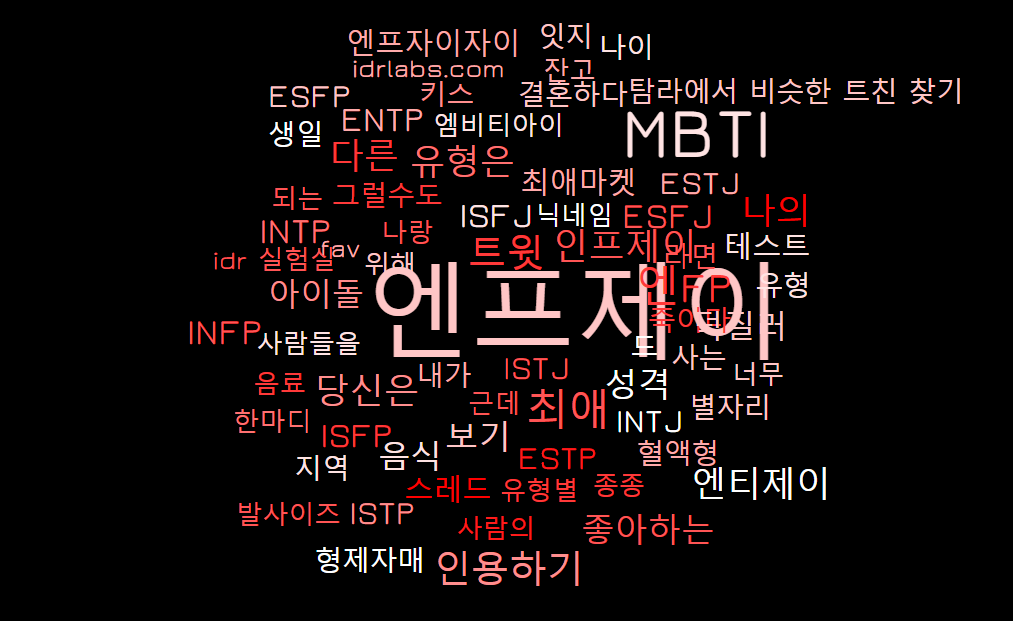

In [8]:
from IPython.display import Image
 
Image(r"C:\Users\q\Desktop\ÎπÖÎ∂ÑÏñë\7 ÌÅ¨Î°§ÎßÅ, Ï†ïÏ†ú\ÎØ∏ÎãàÌîÑÎ°úÏ†ùÌä∏\enfj.png") # codeÏïàÏóêÏÑú ÎÇòÏò§Í≤å Ìï† Îïå

### ÎèÑÏÑú API

In [2]:
client_id = "SFBVy_Sps38LXkNxHNoq"
client_secret = "zlixlrNhi3"

query = urllib.parse.quote(input('Í≤ÄÏÉâÌï† Îã®Ïñ¥'))
display = 100
start = 1
end = 1000
idx = 0
sort = 'sim'

df = pd.DataFrame(columns=['Title', 'Link',  'Publisher', 'Isbn', 'Pubdate', 'Description'])

for start_index in range(start, end, display):
    url = "https://openapi.naver.com/v1/search/book?query=" + query + \
        "&display=" + str(display) + \
        "&start=" + str(start_index) + \
        "&sort=" + sort
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if (rescode == 200):
        response_body = response.read()
        items = json.loads(response_body.decode('utf-8'))["items"]
        remove_tag = re.compile('<.*?>')
        for item_index in range(0, len(items)):
            title = re.sub(remove_tag, '', items[item_index]['title'])
            link = items[item_index]['link'] # Ï†úÎ™©
            image = items[item_index]['image'] # Ïç∏ÎÑ§Ïùº Ïù¥ÎØ∏ÏßÄÏùò URL
            author = items[item_index]['author'] # Ï†ÄÏûê
            price = items[item_index]['price'] # Ï†ïÍ∞Ä
            discount = items[item_index]['discount'] # Ìï†Ïù∏Í∞ÄÍ≤©
            publisher = items[item_index]['publisher'] # Ï∂úÌåêÏÇ¨
            isbn = items[item_index]['isbn'] # Íµ≠Ï†úÌëúÏ§ÄÎèÑÏÑúÎ≤àÌò∏(ISBN) ÎÑòÎ≤Ñ
            description = re.sub(remove_tag, '', items[item_index]['description']) # Í≤ÄÏÉâÍ≤∞Í≥º Î¨∏ÏÑúÏùò ÎÇ¥Ïö© ÏöîÏïΩ
            pubdate = items[item_index]['pubdate'] # Ï∂úÍ∞ÑÏùº

            df.loc[idx] = [title, link, publisher, isbn, pubdate, description]
            idx += 1
    else:
        print("Error Code: " + rescode)

df.loc[0:3]

Title  \
0  ÌùîÌïúÎÇ®Îß§ ÌùîÌïú MBTI (ÎØøÍ±∞ÎÇò ÎßêÍ±∞ÎÇò ÎÇòÏóêÍ≤å Ïñ¥Ïö∏Î¶¨Îäî ÏßÅÏóÖ)   
1  Ïö∞Î¶¨Îì§Ïùò MBTI (ÎÇòÏùò ÏÑ±Í≤©ÏùÑ Ïù¥Ìï¥ÌïòÍ≥† Îçî Î©ãÏßÑ ÎÇ¥Í∞Ä ÎêòÎäî)   
2                   ÎÇòÏùò MBTIÍ∞Ä Í∂ÅÍ∏àÌïòÎã® ÎßàÎ¶¨Î™Ω   
3              MBTIÏùò ÏùòÎØ∏ (MBTIÎäî Í≥ºÌïôÏù∏Í∞Ä?)   

                                                Link Publisher  \
0  http://book.naver.com/bookdb/book_detail.php?b...      ÎåÄÏõêÌÇ§Ï¶à   
1  http://book.naver.com/bookdb/book_detail.php?b...     Îã§ÏÇ∞Ïñ¥Î¶∞Ïù¥   
2  http://book.naver.com/bookdb/book_detail.php?b...       ÎçîÎ™®Îçò   
3  http://book.naver.com/bookdb/book_detail.php?b...     ÌïòÏõÄÏ∂úÌåêÏÇ¨   

                       Isbn   Pubdate  \
0  1136273794 9791136273796  20210901   
1  1130639401 9791130639406  20210726   
2  1164455354 9791164455355  20211130   
3  1164407112 9791164407118  20201119   

                                         Description  
0  ÌùîÌïúÎÇ®Îß§ÏôÄ Ìï®Íªò Îñ†ÎÇòÎäîMBTI Ïú†ÌòïÎ≥Ñ ÏßÅÏóÖ Ïó¨Ìñâ„ÄéÌùîÌïú MBTI„ÄèÎäî ÎÑêÎ¶¨ ÏïåÎ†§ÏßÑ MB...  
1  MBTIÎäî ÏÑ±Í≤© Ïú†ÌòïÎßàÎã§ ÌÉÄÍ≥†ÎÇú Í∞ïÏ†êÏùÑ ÌôúÏö©ÌïòÍ≥† Îã®Ï†êÏùÑ Î≥¥ÏôÑÌïòÎ©¥ÏÑú ÏÑ±Ïû•Ìï† Ïàò ÏûàÎäî ...  
2  Ïó¨Îü¨Î∂ÑÏùò MBTIÎäî Î¨¥ÏóáÏûÖÎãàÍπå?\n\nÌòàÏï°Ìòï AÌòïÏùÄ ÏÜåÏã¨ÌïòÍ≥†, OÌòïÏùÄ ÌôúÎ∞úÌïòÎã§Í≥† Ïú†...  
3  &quot;MBTIÎäî Í≥ºÌïôÏ†ÅÏù∏Í∞Ä?&quot; Ïù¥ ÏßàÎ¨∏Ïóê ÎåÄÌïú ÎÇòÏùò ÎåÄÎãµÏùÄ Ïù¥Í≤ÉÏù¥Îã§....

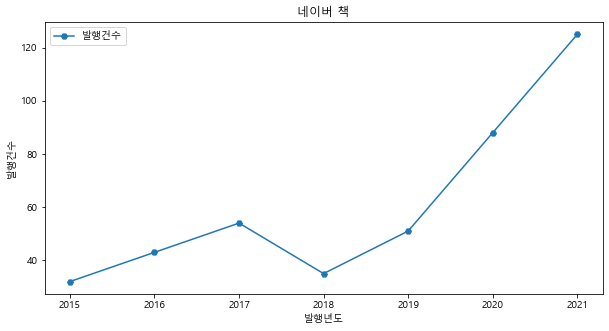

In [5]:
# Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú
date = {'2015':0,'2016':0,'2017':0,'2018':0,'2019':0,'2020':0,'2021':0}
date_k = list(date.keys())

for i in range(0,len(df)):
    for j in range(0,len(date_k)):
        if date_k[j] in df['Pubdate'][i]:
            date[date_k[j]] += 1

date_v = list(date.values())

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot2(date_k, date_v, 'ÎÑ§Ïù¥Î≤Ñ Ï±Ö','line','Î∞úÌñâÎÖÑÎèÑ','Î∞úÌñâÍ±¥Ïàò')